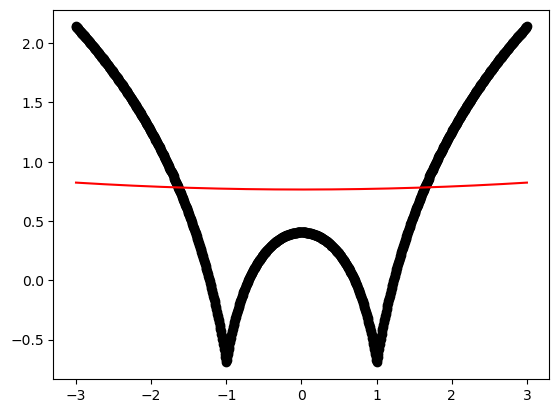

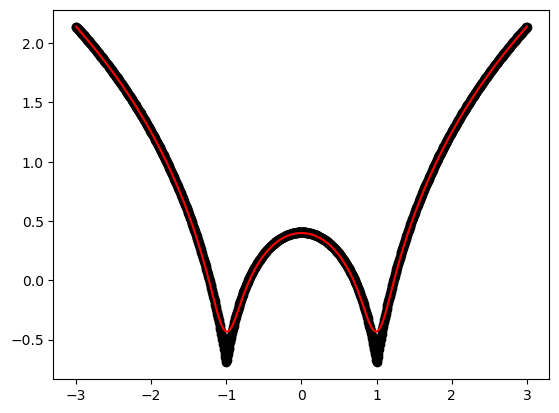

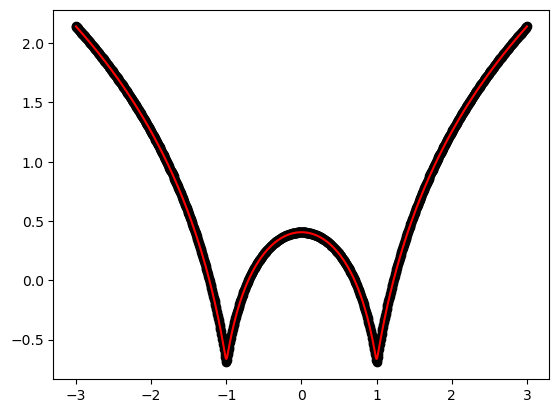

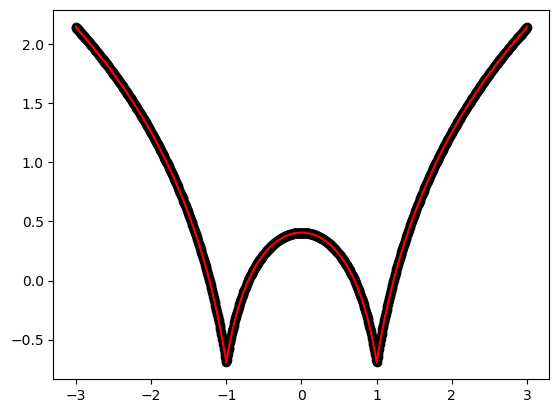

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def local_regression(x0, X, Y, tau):
    x0 = [1, x0]   
    X = [[1, i] for i in X]
    X = np.asarray(X)
    xw = (X.T) * np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * (tau**2)))
    beta = (np.linalg.pinv(xw @ X)) @ (xw @ Y)   
    return (beta @ x0)   

def draw(tau):
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plt.plot(X, Y, 'o', color='black')
    plt.plot(domain, prediction, color='red')
    plt.show()

X = np.linspace(-3, 3, num=1000)
domain = X
Y = np.log(np.abs((X ** 2) - 1) + .5)

draw(10)
draw(0.1)
draw(0.01)
draw(0.001)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kernal(point,xmat,k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point-x[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
        return weights
    
def localweight(point,xmat,ymat,k):
    wt = kernal(point,xmat,k)
    w = (x.T*(wt*x)).I*(x.T*wt*ymat.T)
    return w

def localweightregression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localweight(xmat[i],xmat,ymat,k)
        print(ypred[i])
    return ypred

data = pd.read_csv('Tips.csv')
cola = np.array(data.total_bill)
colb = np.array(data.tip)
mcola = np.mat(cola)
mcolb = np.mat(colb)
m = np.shape(mcolb)[1]
one = np.ones((1,m),dtype=int)
x = np.hstack((one.T,mcola.T))
print(x.shape)
ypred = localweightregression(x,mcolb,0.5)
xsort = x.copy()
xsort.sort(axis=0)
plt.scatter(cola,colb,color='blue')
plt.plot(xsort[:,1],ypred[x[:,1].argsort(0)],color='yellow',linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('tip')
plt.show()

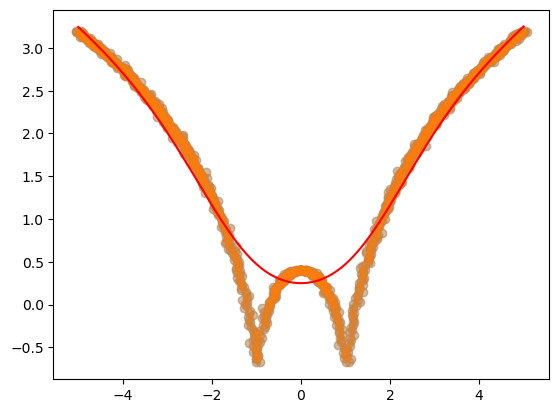

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)
y = np.log(np.abs((x ** 2) - 1) + 0.5)
x = x + np.random.normal(scale=0.05, size=1000) 
plt.scatter(x, y, alpha=0.3)
def local_regression(x0, x, y, tau): 
    x0 = np.r_[1, x0]
    x = np.c_[np.ones(len(x)), x]
    xw =x.T * radial_kernel(x0, x, tau) 
    beta = np.linalg.pinv(xw @ x) @ xw @ y 
    return x0 @ beta


def radial_kernel(x0, x, tau):
    return np.exp(np.sum((x - x0) ** 2, axis=1) / (-2 * tau ** 2))


def plot_lr(tau):
    domain = np.linspace(-5, 5, num=500)
    pred = [local_regression(x0, x, y, tau) for x0 in domain] 
    plt.scatter(x, y, alpha=0.3)
    plt.plot(domain, pred, color="red") 
    return plt


plot_lr(1).show()